In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata as ad
from scanpy import read_10x_h5
import random
import os
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

/home/tuwenqian/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


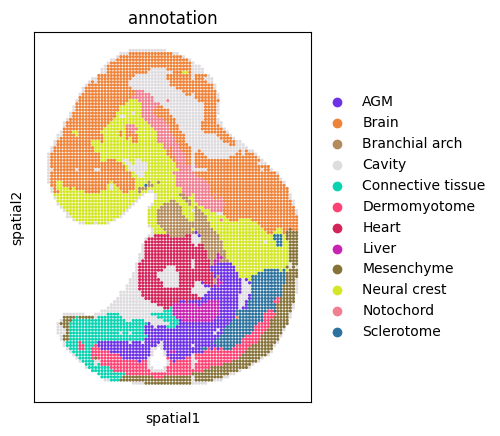

AnnData object with n_obs × n_vars = 5913 × 25568
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - 2310011J03Rik', 'Regulon - 5730507C01Rik', 'Regulon - Alx1', 'Regulon - Alx3', 'Regulon - Alx4', 'Regulon - Ar', 'Regulon - Arid3a', 'Regulon - Arid3c', 'Regulon - Arnt2', 'Regulon - Arx', 'Regulon - Ascl1', 'Regulon - Atf1', 'Regulon - Atf4', 'Regulon - Atf5', 'Regulon - Atf6', 'Regulon - Atf7', 'Regulon - Bach1', 'Regulon - Bach2', 'Regulon - Barhl1', 'Regulon - Barx1', 'Regulon - Batf', 'Regulon - Bcl11a', 'Regulon - Bcl3', 'Regulon - Bcl6', 'Regulon - Bcl6b', 'Regulon - Bclaf1', 'Regulon - Bdp1', 'Regulon - Bhlha15', 'Regulon - Bhlhe22', 'Regulon - Bhlhe23', 'Regulon - Bhlhe41', 'Regulon - Bmyc', 'Regulon - Boll', 'Regulon - Bptf', 'Regulon - Brca1', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Bsx', 'Regulon - Cdx1', 'Regulon - Cdx2', 'Regulon - Cebpa', 'Regulon - Cebpz', 'Regulon - Chd1', 'Regulon - Clock', 'Re

In [2]:
adata_stereo = sc.read_h5ad('./data/embryo/E9.5_E1S1.MOSTA.h5ad')
sc.pl.spatial(adata_stereo,color=['annotation'],spot_size=1)
adata_stereo

In [4]:
replacement_dict_stereo = {'Neural crest':'Neural crest (stereo)',
                    'Dermomyotome':'Dermomyotome (stereo)',
                    'Sclerotome':'Sclerotome (stereo)'}
adata_stereo.obs['annotation'] = adata_stereo.obs['annotation'].cat.rename_categories(replacement_dict_stereo)
adata_stereo.obs['annotation']

cell_name
147_104        Cavity
147_105        Cavity
147_106        Cavity
147_107        Cavity
147_108    Mesenchyme
              ...    
253_110        Cavity
253_111        Cavity
253_112        Cavity
253_113        Cavity
253_114        Cavity
Name: annotation, Length: 5913, dtype: category
Categories (12, object): ['AGM', 'Brain', 'Branchial arch', 'Cavity', ..., 'Mesenchyme', 'Neural crest (stereo)', 'Notochord', 'Sclerotome (stereo)']

In [96]:
filepath = './data/embryo'
adata_stereo.write(f'{filepath}/adata_stereo.h5ad')

In [97]:
gene_seqFISH_total= pd.read_csv('./data/embryo/gene_expr.csv',sep=",",index_col=0)
meta_seqFISH_total=pd.read_csv('./data/embryo/metadata1.csv',sep=",",index_col=0)
gene_seqFISH_total

,embryo1_Pos0_cell10_z2,embryo1_Pos0_cell10_z5,embryo1_Pos0_cell100_z2,embryo1_Pos0_cell100_z5,embryo1_Pos0_cell101_z2,embryo1_Pos0_cell101_z5,embryo1_Pos0_cell102_z2,embryo1_Pos0_cell102_z5,embryo1_Pos0_cell103_z2,embryo1_Pos0_cell103_z5,...,embryo3_Pos39_cell90_z5,embryo3_Pos39_cell91_z5,embryo3_Pos39_cell92_z2,embryo3_Pos39_cell93_z5,embryo3_Pos39_cell94_z2,embryo3_Pos39_cell95_z5,embryo3_Pos39_cell96_z5,embryo3_Pos39_cell97_z2,embryo3_Pos39_cell98_z5,embryo3_Pos39_cell99_z2
Abcc4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.553211,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Acp5,1.176114,0.000000,2.198142,0.000000,1.482559,0.000000,0.000000,0.790918,1.944707,0.000000,...,0.00000,3.687975,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.842009,0.000000
Acvr1,0.505780,0.000000,0.000000,0.785119,0.000000,0.000000,0.286159,0.448993,0.776019,0.952107,...,0.74788,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Acvr2a,0.000000,0.000000,0.000000,0.785119,1.482559,0.789751,0.000000,0.000000,1.277865,0.553211,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Adora2b,0.000000,0.000000,0.000000,0.785119,0.000000,0.000000,0.286159,0.000000,0.000000,0.553211,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wnt8a,0.000000,0.000000,1.482559,0.785119,0.000000,0.000000,0.286159,0.448993,0.000000,0.000000,...,0.74788,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Xist,0.879535,1.731027,1.482559,0.785119,0.000000,0.789751,2.369717,1.298864,0.000000,0.000000,...,1.23796,0.000000,3.203284,1.355638,0.00000,0.0,1.456833,2.205265,2.311131,0.000000
Zfp444,0.000000,0.000000,0.000000,0.785119,0.000000,0.789751,0.729590,0.790918,1.277865,0.000000,...,0.74788,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Zfp57,0.879535,1.731027,0.000000,0.785119,0.000000,1.671895,0.286159,1.298864,0.776019,1.264262,...,0.00000,0.000000,1.243926,1.355638,0.00000,0.0,0.904986,1.140036,1.370214,2.399006


In [98]:
adata_fish_total = ad.AnnData(gene_seqFISH_total.T,obs=meta_seqFISH_total)
# =adata[adata.obs['sample'] == 'A', :]
adata_fish = adata_fish_total[adata_fish_total.obs['embryo']=='embryo2']
print(adata_fish)
bool_index = np.isin(adata_fish.obs['celltype_mapped_refined'], ['Low quality'])
adata_fish = adata_fish[~bool_index]
spatial_fish = adata_fish.obs[['x_global','y_global']]
adata_fish.obsm['spatial'] = spatial_fish.to_numpy()
adata_fish.obs['celltype_mapped_refined'] = adata_fish.obs['celltype_mapped_refined'].astype('category')
replacement_dict_seq = {'Neural crest':'Neural crest (seqFISH)',
                    'Dermomyotome':'Dermomyotome (seqFISH)',
                    'Sclerotome':'Sclerotome (seqFISH)'}
adata_fish.obs['celltype_mapped_refined'] = adata_fish.obs['celltype_mapped_refined'].cat.rename_categories(replacement_dict_seq)

adata_fish

View of AnnData object with n_obs × n_vars = 14891 × 351
    obs: 'uniqueID', 'embryo', 'pos', 'z', 'x_global', 'y_global', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z', 'Area', 'UMAP1', 'UMAP2', 'celltype_mapped_refined'


/tmp/ipykernel_709588/2324402041.py:8: ImplicitModificationWarning:

Setting element `.obsm['spatial']` of view, initializing view as actual.



AnnData object with n_obs × n_vars = 14185 × 351
    obs: 'uniqueID', 'embryo', 'pos', 'z', 'x_global', 'y_global', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z', 'Area', 'UMAP1', 'UMAP2', 'celltype_mapped_refined'
    obsm: 'spatial'

### Data Prepocessing

In [10]:
# stereo
sc.pp.calculate_qc_metrics(adata_stereo, inplace=True)

sc.pp.filter_cells(adata_stereo, min_genes=100)
sc.pp.filter_genes(adata_stereo, min_cells=50)
print('After flitering: ', adata_stereo.shape)
# 处理数据
sc.pp.highly_variable_genes(adata_stereo, flavor="seurat_v3", n_top_genes=7000)
sc.pp.normalize_total(adata_stereo, target_sum=1e4)
sc.pp.log1p(adata_stereo)  #将数据矩阵对数化

After flitering:  (5889, 15755)


/home/tuwenqian/anaconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [132]:
# seq fish
# sc.pp.calculate_qc_metrics(adata_fish, inplace=True)

sc.pp.filter_cells(adata_fish, min_genes=90)
print('After flitering: ', adata_fish.shape)
# 处理数据
adata_fish

After flitering:  (8792, 351)


AnnData object with n_obs × n_vars = 8792 × 351
    obs: 'uniqueID', 'embryo', 'pos', 'z', 'x_global', 'y_global', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z', 'Area', 'UMAP1', 'UMAP2', 'celltype_mapped_refined', 'n_genes'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'spatial'

In [21]:
adata_fish.obs['celltype_mapped_refined'].value_counts()

Forebrain/Midbrain/Hindbrain      2460
Gut tube                          1026
Cranial mesoderm                   893
Mixed mesenchymal mesoderm         598
Endothelium                        470
Splanchnic mesoderm                455
Spinal cord                        445
Cardiomyocytes                     426
Surface ectoderm                   400
Haematoendothelial progenitors     356
Neural crest                       350
Dermomyotome                       271
Sclerotome                         210
Anterior somitic tissues           173
Intermediate mesoderm              155
Erythroid                           67
NMP                                 14
Definitive endoderm                  9
Allantois                            9
Blood progenitors                    4
Lateral plate mesoderm               1
Name: celltype_mapped_refined, dtype: int64

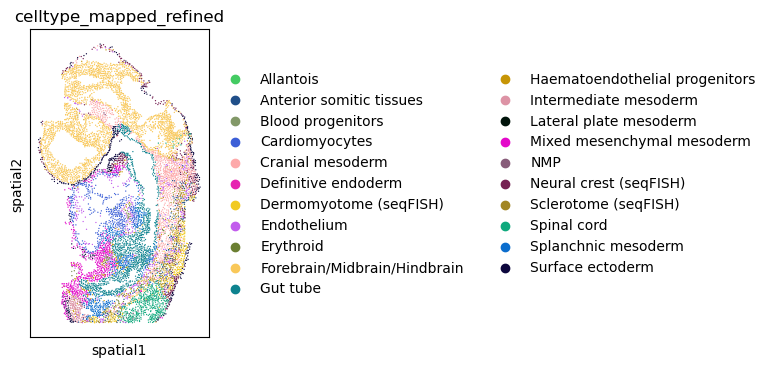

In [133]:
sc.pl.spatial(adata_fish,color=['celltype_mapped_refined'],spot_size=1)

In [134]:
adata_fish.obs['annotation'] = adata_fish.obs['celltype_mapped_refined']
adata_fish

AnnData object with n_obs × n_vars = 8792 × 351
    obs: 'uniqueID', 'embryo', 'pos', 'z', 'x_global', 'y_global', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z', 'Area', 'UMAP1', 'UMAP2', 'celltype_mapped_refined', 'n_genes', 'annotation'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'spatial'

In [135]:
intersection = adata_stereo[:, adata_stereo.var.highly_variable].var_names.intersection(adata_fish.var_names)
intersection

Index(['Col1a1', 'Dlk1', 'Dll1', 'F2r', 'Fgfr1', 'Irx3', 'Notch1', 'Nr2f1',
       'Ptn', 'Sfrp1',
       ...
       'Slc7a3', 'Fezf1', 'Six3', 'Nkx2-3', 'Fgf17', 'Sox10', 'Hes3', 'Car7',
       'Tbx4', 'Evx1'],
      dtype='object', length=227)

In [136]:
union_index = intersection.union(adata_fish.var_names)
# union_index = union_index.difference(adata_stereo.var_names)
union_index

Index(['Abcc4', 'Acp5', 'Acvr1', 'Acvr2a', 'Adora2b', 'Afp', 'Ahnak',
       'Akr1c19', 'Alas2', 'Aldh1a2',
       ...
       'Wnt2b', 'Wnt3', 'Wnt3a', 'Wnt5a', 'Wnt5b', 'Wnt8a', 'Xist', 'Zfp444',
       'Zfp57', 'Zic3'],
      dtype='object', length=351)

In [137]:
drop_index = union_index.difference(adata_stereo.var_names)

In [138]:
final_intersection = union_index.difference(drop_index)
final_intersection

Index(['Abcc4', 'Acp5', 'Acvr1', 'Acvr2a', 'Adora2b', 'Afp', 'Ahnak',
       'Akr1c19', 'Alas2', 'Aldh1a2',
       ...
       'Wnt2', 'Wnt2b', 'Wnt3', 'Wnt3a', 'Wnt5a', 'Wnt5b', 'Xist', 'Zfp444',
       'Zfp57', 'Zic3'],
      dtype='object', length=317)

In [139]:
# adata_stereo = adata_stereo[:, adata_stereo.var.highly_variable]
# intersection = adata_stereo.var_names.intersection(adata_fish.var_names)
adata_stereo_svg = adata_stereo[:,final_intersection]
adata_fish_svg = adata_fish[:,final_intersection]
adata_fish_svg

View of AnnData object with n_obs × n_vars = 8792 × 317
    obs: 'uniqueID', 'embryo', 'pos', 'z', 'x_global', 'y_global', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z', 'Area', 'UMAP1', 'UMAP2', 'celltype_mapped_refined', 'n_genes', 'annotation'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'spatial'

In [140]:
adata_new1 = adata_stereo_svg.concatenate(adata_fish_svg, index_unique=None)

section_ids = ['stereo','seqFISH']
print(section_ids)
adata_stereo_svg.obs_names = [x+'_'+section_ids[0] for x in adata_stereo_svg.obs_names]
adata_fish_svg.obs_names = [x+'_'+section_ids[1] for x in adata_fish_svg.obs_names]

/tmp/ipykernel_2049658/1053504493.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_new1 = adata_stereo_svg.concatenate(adata_fish_svg, index_unique=None)


['stereo', 'seqFISH']


In [141]:
Batch_list = [adata_stereo_svg, adata_fish_svg]
adata_concat = ad.concat(Batch_list, label="slice_name", keys=section_ids)
adata_concat.obs["batch"] = adata_concat.obs["slice_name"].astype('category')
print('adata_concat.shape: ', adata_concat.shape)

adata_concat.shape:  (14681, 317)


In [142]:
adata_concat

AnnData object with n_obs × n_vars = 14681 × 317
    obs: 'annotation', 'n_genes', 'slice_name', 'batch'
    obsm: 'spatial'

In [143]:
n1 =adata_stereo_svg.X.shape[0]
n2 =adata_fish_svg.X.shape[0]
print(n1)
print(n2)

5889
8792


In [144]:
adata = adata_concat
filepath = './data/embryo'
adata.write(f'{filepath}/adata_cat.h5ad')

### start training

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata
from scanpy import read_10x_h5
import os

In [3]:
import torch
from scipy.sparse import csr_matrix
def load_data(filepath):
    adata = sc.read_h5ad(f'{filepath}/adata_cat.h5ad')
    print('finish reading h5ad')
    # sub_graph_df = pd.read_pickle(f'{filepath}/sub_graph_7k.pickle')
    # sub_graph = sub_graph_df.values
    # print(f'sub_graph shape:{sub_graph.shape}')
    # sub_graph = torch.from_numpy(sub_graph)
    if isinstance(adata.X, csr_matrix):
        concat_expr = adata.X.toarray()
    else:
        concat_expr = adata.X
    # concat_expr = adata.X
    cor_cat = adata.obsm['spatial']
    Y = torch.from_numpy(concat_expr).to(torch.float32)
    coord = torch.from_numpy(cor_cat).to(torch.float32)
    
    return Y,coord,cor_cat,adata

In [4]:
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
filepath = './data/embryo'
Y,coord,cor_cat,adata = load_data(filepath)

finish reading h5ad


In [5]:
adata

AnnData object with n_obs × n_vars = 14681 × 317
    obs: 'annotation', 'n_genes', 'slice_name', 'batch'
    obsm: 'spatial'

In [19]:

n_list = [n1,n2]


NameError: name 'n1' is not defined

In [7]:
n_list = [5889, 8792]

In [26]:
from model import SpaMC

spamc = SpaMC(adata,Y,cor_cat,n_list,latent_dim=30)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool'}
Done! 54 communities detected. 



In [6]:
spatial_regularization=1.0
lamb=1.0
result_filepath = './results/embryo/'

In [28]:
embedding = spamc.train(f'./{result_filepath}/sp{spatial_regularization}_lamb{lamb}_change/',
                        start_epoch=0,
                        epochs=5000,
                        spatial_regularization_strength=spatial_regularization,
                        lamb=lamb,
                        use_partialOT=False,
                        max_patience=100,
                        min_stop=300,
                        check_inter=100
                        )

cuda:0
start epoch:0
         Falling back to preprocessing with `sc.pp.pca` and default params.
mnn calculated!
total: 13.753956 base_loss: 10.023626, penalty: 1.166676, cross_loss:2.563654,cross_distance:109180.906250
total: 13.162252 base_loss: 9.770224, penalty: 1.090084, cross_loss:2.301944,cross_distance:98035.203125
total: 12.700906 base_loss: 9.495317, penalty: 1.071073, cross_loss:2.134517,cross_distance:90904.796875
total: 12.607972 base_loss: 9.500077, penalty: 1.081170, cross_loss:2.026725,cross_distance:86314.171875
total: 12.489909 base_loss: 9.460906, penalty: 1.080126, cross_loss:1.948877,cross_distance:82998.781250
total: 12.526536 base_loss: 9.570868, penalty: 1.077272, cross_loss:1.878396,cross_distance:79997.125000
total: 12.443275 base_loss: 9.571193, penalty: 1.056929, cross_loss:1.815153,cross_distance:77303.757812
total: 12.435111 base_loss: 9.634475, penalty: 1.046256, cross_loss:1.754380,cross_distance:74715.531250
total: 12.173226 base_loss: 9.411876, penalty

In [29]:
embedding = pd.DataFrame(embedding)

In [7]:
embedding = pd.read_csv(f'{result_filepath}/sp1.0_lamb1.0_change/embedding_final_epoch1682_seed42.csv',header=None,delimiter='\t')

(14681, 30)


/home/tuwenqian/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/tuwenqian/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/tuwenqian/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


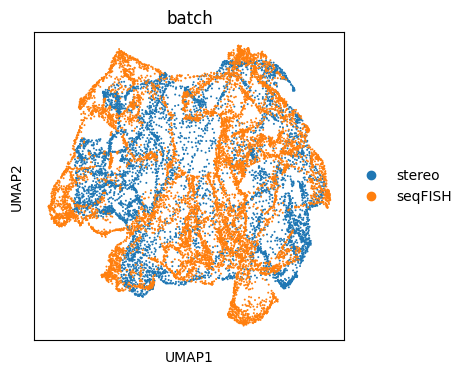

In [8]:
import matplotlib.pyplot as plt
import anndata as ad
print(embedding.shape)
#var = pd.DataFrame(index=spatial_result.columns)
obs = adata.obs
embedding = pd.DataFrame(embedding)
embedding.index = obs.index

adata_x = ad.AnnData(embedding,obs=obs)
# adata_x.obsm['X_pca_old'] = adata.obsm['X_pca'].copy()
adata_x.obsm['spatial'] = adata.obsm['spatial']
adata_x.obsm['spamc'] = adata_x.X

# adata_x.obsm['spaceFlow'] = embedding_x
# adata_x.obsm['X_pca'] = embedding_x
sc.pp.neighbors(adata_x, use_rep='spamc',random_state=666)
# sc.tl.louvain(adata_x,random_state=666, key_added="louvain", resolution=0.1)
sc.tl.umap(adata_x,random_state=666)



plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_x,color=["batch"], wspace=0.4) #UMAP基础散点图
# sc.pl.umap(adata_x,color=["batch",'annotation_replace'], wspace=0.4) #UMAP基础散点图
#sc.pl.umap(adata_x,color=["batch",'annotation'], wspace=0.4) #UMAP基础散点图

/home/tuwenqian/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/tuwenqian/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


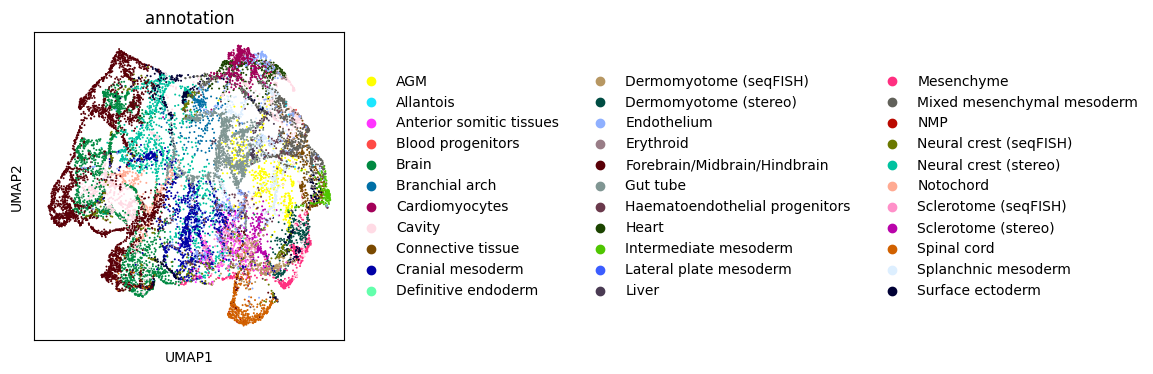

In [9]:
sc.pl.umap(adata_x,color=['annotation'], wspace=0.4) 

/home/tuwenqian/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


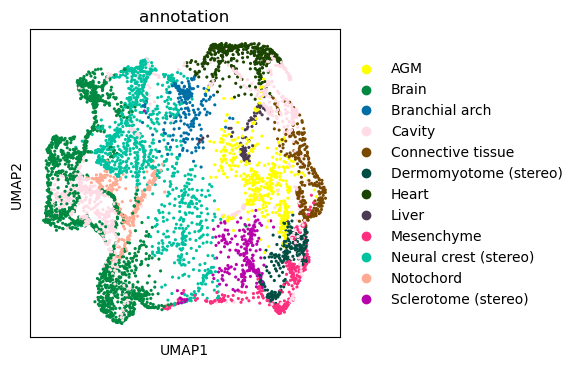

In [19]:
sc.pl.umap(adata_x[adata_x.obs['batch']=='stereo'],color=['annotation'], wspace=0.4) 

In [12]:
import scSLAT
from scSLAT.model import Cal_Spatial_Net, load_anndatas, run_SLAT, spatial_match
from scSLAT.viz import match_3D_multi, hist, Sankey
from scSLAT.metrics import region_statistics

In [ ]:
import torch

In [34]:
adata2.X.shape

(8792, 30)

In [15]:
best, index, distance = spatial_match([torch.from_numpy(adata1.X),torch.from_numpy(adata2.X)], adatas=[adata1,adata2], reorder=False,top_n=30)

In [16]:
adata1_df = pd.DataFrame({'index': range(adata1.X.shape[0]),
                        'x': adata1.obsm['spatial'][:,0],
                        'y': adata1.obsm['spatial'][:,1],
                        'celltype': adata1.obs['annotation']})
adata2_df = pd.DataFrame({'index': range(adata2.X.shape[0]),
                        'x': adata2.obsm['spatial'][:,0],
                        'y': adata2.obsm['spatial'][:,1],
                        'celltype': adata2.obs['annotation']})

matching = np.array([range(index.shape[0]), best])
best_match = distance[:,0]

In [18]:
adata2_df['target_celltype'] = adata1_df.iloc[matching[1,:],:]['celltype'].to_list()
matching_table = adata2_df.groupby(['celltype','target_celltype']).size().unstack(fill_value=0)

In [23]:
Sankey(matching_table, prefix=['stereo','seqFISH'],font_size=20,title=None)